# Stacked Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("../Convolutional-Neural-Networks/MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.reset_default_graph() 

## Parameters

In [6]:
num_inputs = 784    # 28*28
neurons_hid1 = 392  # 754/2
neurons_hid2 = 196
neurons_hid3 = neurons_hid1 # Decoder Begins
num_outputs = num_inputs

learning_rate = 0.01

### Placeholder

In [7]:
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

### Weights

Initializer capable of adapting its scale to the shape of weights tensors.

With `distribution="normal"`, samples are drawn from a truncated normal
distribution centered on zero, with `stddev = sqrt(scale / n)`
where n is:
  - number of input units in the weight tensor, if mode = "fan_in"
  - number of output units, if mode = "fan_out"
  - average of the numbers of input and output units, if mode = "fan_avg"

With `distribution="uniform"`, samples are drawn from a uniform distribution
within [-limit, limit], with `limit = sqrt(3 * scale / n)`.


In [8]:
initializer = tf.variance_scaling_initializer()

In [9]:
w1 = tf.Variable(initializer(shape=[num_inputs, neurons_hid1]), dtype=tf.float32)
w2 = tf.Variable(initializer(shape=[neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initializer(shape=[neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initializer(shape=[neurons_hid3, num_outputs]), dtype=tf.float32)

### Biases

In [10]:
b1 = tf.Variable(tf.zeros(neurons_hid1))
b2 = tf.Variable(tf.zeros(neurons_hid2))
b3 = tf.Variable(tf.zeros(neurons_hid3))
b4 = tf.Variable(tf.zeros(num_outputs))

### Activation Function and Layers

In [11]:
act_func = tf.nn.relu

In [12]:
hid_layer1 = act_func(tf.matmul(X, w1) + b1)
hid_layer2 = act_func(tf.matmul(hid_layer1, w2) + b2)
hid_layer3 = act_func(tf.matmul(hid_layer2, w3) + b3)
output_layer = tf.matmul(hid_layer3, w4) + b4

### Loss Function

In [13]:
loss = tf.reduce_mean(tf.square(output_layer - X))

### Optimizer

In [14]:
#tf.train.RMSPropOptimizer
optimizer = tf.train.AdamOptimizer(learning_rate)

In [15]:
train = optimizer.minimize(loss)

### Intialize Variables

In [16]:
init = tf.global_variables_initializer()

In [17]:
saver = tf.train.Saver() 

In [22]:
num_epochs = 25
batch_size = 150

with tf.Session() as sess:
    sess.run(init)
    
    # Epoch == Entire Training Set
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size # number of batches in one epoch
        
        training_loss = 0
                
        # 150 batch size
        for iteration in range(num_batches):
            
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            _, batch_loss = sess.run([train, loss], feed_dict={X:X_batch})
            training_loss += batch_loss
        
        print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss/num_batches))
     
    saver.save(sess, "./stacked_autoencoder.ckpt")      

Epoch 0 Complete. Training Loss: 0.03870957359020176
Epoch 1 Complete. Training Loss: 0.027623042357383203
Epoch 2 Complete. Training Loss: 0.026132829955529645
Epoch 3 Complete. Training Loss: 0.02541366909615329
Epoch 4 Complete. Training Loss: 0.024983162584567006
Epoch 5 Complete. Training Loss: 0.024703138904859784
Epoch 6 Complete. Training Loss: 0.02448203467097276
Epoch 7 Complete. Training Loss: 0.024273476013761074
Epoch 8 Complete. Training Loss: 0.02425793406701153
Epoch 9 Complete. Training Loss: 0.024130556849467626
Epoch 10 Complete. Training Loss: 0.023962480443545053
Epoch 11 Complete. Training Loss: 0.023926473141245828
Epoch 12 Complete. Training Loss: 0.02379925883390376
Epoch 13 Complete. Training Loss: 0.023808228457601017
Epoch 14 Complete. Training Loss: 0.02365423661091777
Epoch 15 Complete. Training Loss: 0.02358354611800668
Epoch 16 Complete. Training Loss: 0.023615930117463154
Epoch 17 Complete. Training Loss: 0.02362118644100395
Epoch 18 Complete. Training 

## Test Autoencoder output on Test Data

In [23]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,"./stacked_autoencoder.ckpt")
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./stacked_autoencoder.ckpt


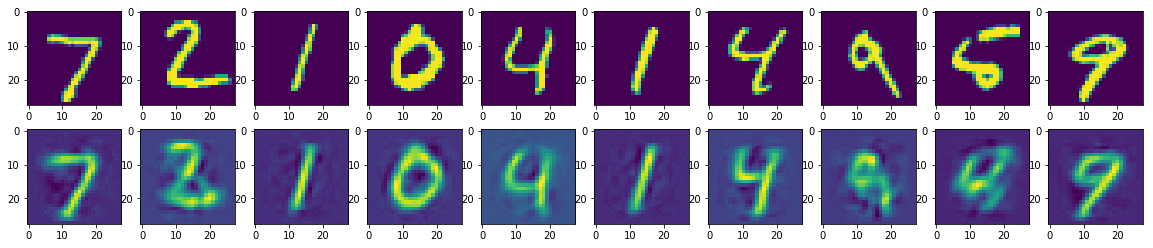

In [24]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(results[i], (28, 28)))